In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import(Dense, Dropout, Activation, Flatten)
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [5]:
path = os.listdir("/media/dolan/Backup Plus/Bodybuilders")
len(path)

210

In [6]:
class Data:
    
    def __init__(self):
        self.bodybuilders = []
        self.natties = []
        self.training_data = []
        self.test_data = []
        self.path = "/media/dolan/Backup Plus/"
        self.IMG_SIZE = 125
    
    def generate(self, string): #string === pathnameend
        path = os.path.join(self.path, string)
        if string == 'Bodybuilders':
            class_num = 1
        elif string == 'Natty':
            class_num = 0
        else:
            return
        counter = 0
        for img in os.listdir(path):
            if class_num == 1:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.bodybuilders.append([new_array,class_num])
                except Exception as e:
                    pass     
            elif class_num == 0:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (self.IMG_SIZE,self.IMG_SIZE))
                    self.natties.append([new_array,class_num])
                except Exception as e:
                    pass   
            else:
                print("Classnum is not valid friend")
                
            counter += 1
            
            print("Image resized: ", counter)


In [7]:
data = Data()
data.generate('Bodybuilders')
data.generate('Natty')

Image resized:  1
Image resized:  2
Image resized:  3
Image resized:  4
Image resized:  5
Image resized:  6
Image resized:  7
Image resized:  8
Image resized:  9
Image resized:  10
Image resized:  11
Image resized:  12
Image resized:  13
Image resized:  14
Image resized:  15
Image resized:  16
Image resized:  17
Image resized:  18
Image resized:  19
Image resized:  20
Image resized:  21
Image resized:  22
Image resized:  23
Image resized:  24
Image resized:  25
Image resized:  26
Image resized:  27
Image resized:  28
Image resized:  29
Image resized:  30
Image resized:  31
Image resized:  32
Image resized:  33
Image resized:  34
Image resized:  35
Image resized:  36
Image resized:  37
Image resized:  38
Image resized:  39
Image resized:  40
Image resized:  41
Image resized:  42
Image resized:  43
Image resized:  44
Image resized:  45
Image resized:  46
Image resized:  47
Image resized:  48
Image resized:  49
Image resized:  50
Image resized:  51
Image resized:  52
Image resized:  53
Im

In [8]:
print(len(data.bodybuilders), len(data.natties))

210 210


In [9]:
#Shuffle the data
import random

data_ = data.bodybuilders + data.natties
print(len(data_))

random.shuffle(data_)

0.25 * len(data_),0.75 * len(data_) 


420


(105.0, 315.0)

In [10]:
def generate_inputs(dataset):
    X = []
    y = []
    for i in range(len(dataset)):
        X.append(dataset[i][0])
        y.append(dataset[i][1])
        
    return X,y
        

training_data = data_[:315]
test_data = data_[315:]    
    
X_train, y_train = generate_inputs(training_data)
X_test, y_test = generate_inputs(test_data)
X, y = generate_inputs(data_)

In [11]:
len(X_train), len(y_test)

(315, 105)

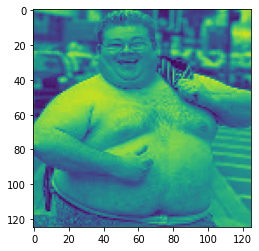

In [14]:
plt.imshow(X_train[5])

In [15]:
#Develop valid dataset by normalizing image arrays`

IMG_SIZE = data.IMG_SIZE
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE,1)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_train = X_train/255.0
X_test = X_test/255.0
X = X/255.0

y = np.array(y)

In [16]:
y.shape, X.shape

((420,), (420, 125, 125, 1))

In [17]:
model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))


model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y,  batch_size = 10, epochs = 10, validation_split = 0.25)

Epoch 1/10
32/32 [==============================] - 82s 2s/step - loss: 0.6826 - accuracy: 0.5556 - val_loss: 0.6077 - val_accuracy: 0.6286
Epoch 2/10
32/32 [==============================] - 146s 5s/step - loss: 0.5980 - accuracy: 0.6921 - val_loss: 0.5449 - val_accuracy: 0.7429
Epoch 3/10
32/32 [==============================] - 123s 4s/step - loss: 0.5554 - accuracy: 0.7365 - val_loss: 0.5757 - val_accuracy: 0.7048
Epoch 4/10
32/32 [==============================] - 93s 3s/step - loss: 0.5193 - accuracy: 0.7460 - val_loss: 0.5443 - val_accuracy: 0.7524
Epoch 5/10
32/32 [==============================] - 90s 3s/step - loss: 0.4375 - accuracy: 0.8032 - val_loss: 0.6399 - val_accuracy: 0.6667
Epoch 6/10
32/32 [==============================] - 81s 3s/step - loss: 0.4050 - accuracy: 0.8349 - val_loss: 0.4928 - val_accuracy: 0.7810
Epoch 7/10
32/32 [==============================] - 86s 3s/step - loss: 0.3055 - accuracy: 0.8857 - val_loss: 0.5500 - val_accuracy: 0.7524
Epoch 8/10
32/32 [

In [19]:
#Predict whether the image is of a dog or of a cat!!!

def predict(data):
    if data.shape == (len(data), IMG_SIZE, IMG_SIZE, 1):
        preds = model.predict(data).tolist()
        
        for i in range(len(preds)):
            if preds[i][0] >= 0.5:
                preds[i] = 'Not'
            elif preds[i][0] < 0.5:
                preds[i] = 'Natty'
        
        return preds
    elif data.shape == (IMG_SIZE, IMG_SIZE, 1):
        data = np.expand_dims(data, axis = 0)
        pred = model.predict(data)
        if pred >= 0.5:
            pred = 'Not'
        else:
            pred = 'Natty'
            
        return pred
    
    else:
        return
        
        

In [29]:
predict(X_train[8])

'Natty'

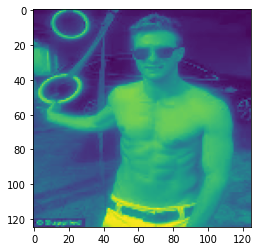

In [28]:
plt.imshow(X_train[8])

(<matplotlib.image.AxesImage at 0x7f7b0c0488e0>,
 array([0.56100214], dtype=float32))

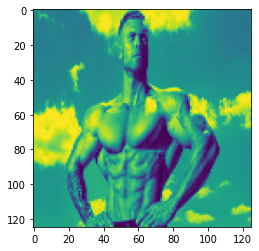

In [53]:
plt.imshow(X_test[7]), preds[7]

In [23]:
preds = model.predict(X_train)

(<matplotlib.image.AxesImage at 0x7f7b0c0ded00>,
 array([0.00764602], dtype=float32))

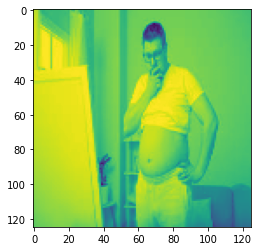

In [52]:
plt.imshow(X_test[2]), preds[2]

(<matplotlib.image.AxesImage at 0x7f7b1f43a340>,
 array([0.9550035], dtype=float32))

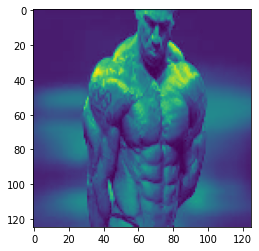

In [27]:
plt.imshow(X_train[11]), preds[11]

(<matplotlib.image.AxesImage at 0x7f7b1c102b50>,
 array([0.03612641], dtype=float32))

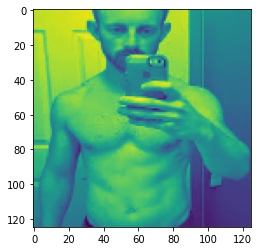

In [43]:
plt.imshow(X_test[22]), preds[22]

# Save The Model

In [117]:
model.save("nattyornot.h5")

### Generate Stack to List Most recent Image

In [44]:
path = '/home/dolan/Downloads/NattyOrNot/backend/media/images'
#len(path)

def generate(string): #string === pathnameend
    path = '/home/dolan/Downloads/NattyOrNot/backend/media/images/'
    path = os.path.join(path, string)
    IMG_SIZE = 125
    
    counter = 0
    
    arr = []
    
    try:
        img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
        #arr.append([new_array,class_num])
    except Exception as e:
        pass     



        counter += 1

        print("Image resized: ", counter)
    return new_array


images_path = os.listdir('/home/dolan/Downloads/NattyOrNot/backend/media/images')
most_recent_upload = images_path.pop(0)
print(most_recent_upload)

download.jpeg


In [45]:
img_array = generate(most_recent_upload)
img_array

array([[51, 53, 57, ..., 82, 81, 81],
       [87, 82, 70, ..., 77, 84, 82],
       [75, 77, 73, ..., 88, 90, 84],
       ...,
       [43, 43, 43, ..., 65, 65, 66],
       [45, 45, 45, ..., 66, 66, 66],
       [45, 45, 45, ..., 67, 66, 66]], dtype=uint8)

In [46]:
#Convert to numpy array in order to feed data to neural network
IMG_SIZE = 125
img_array_ = np.array(img_array).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
img_array_ = img_array_/255.0


In [47]:
img_array.shape, img_array_.shape, img_array_

((125, 125),
 (1, 125, 125, 1),
 array([[[[0.2       ],
          [0.20784314],
          [0.22352941],
          ...,
          [0.32156863],
          [0.31764706],
          [0.31764706]],
 
         [[0.34117647],
          [0.32156863],
          [0.2745098 ],
          ...,
          [0.30196078],
          [0.32941176],
          [0.32156863]],
 
         [[0.29411765],
          [0.30196078],
          [0.28627451],
          ...,
          [0.34509804],
          [0.35294118],
          [0.32941176]],
 
         ...,
 
         [[0.16862745],
          [0.16862745],
          [0.16862745],
          ...,
          [0.25490196],
          [0.25490196],
          [0.25882353]],
 
         [[0.17647059],
          [0.17647059],
          [0.17647059],
          ...,
          [0.25882353],
          [0.25882353],
          [0.25882353]],
 
         [[0.17647059],
          [0.17647059],
          [0.17647059],
          ...,
          [0.2627451 ],
          [0.25882353],
       

In [48]:
model.predict(img_array_) 

array([[0.22917676]], dtype=float32)

(<matplotlib.image.AxesImage at 0x7f7b1c095d00>,
 array([[0.22917676]], dtype=float32))

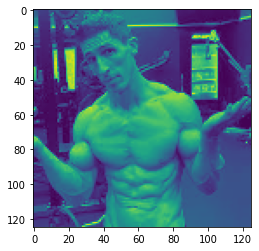

In [49]:
plt.imshow(img_array), model.predict(img_array_)

('Natty',
 array([0.02625465], dtype=float32))

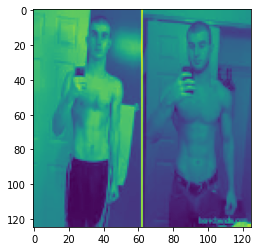

In [50]:
predict(X_test[1]), plt.imshow(X_test[1]), preds[1]

In [127]:
images_path

['Angel_Of_Death.jpg',
 'moi.jpg',
 'meals.jpg',
 'Angel_Of_Death_1RAngKg.jpg',
 'meals_jczglqC.jpg']